Our training and testing dataset:
-714 training images of faces(51 people of different races, each one with 14 images)

-51 testing images of faces(51 people, each one with 1 image)
(Source:http://www.anefian.com/research/face_reco.htm)


In [2]:
import keras
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [3]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers import Conv2D, MaxPooling2D

In [4]:
import numpy as np
import matplotlib.pyplot as plt


Clear the Keras session.


In [5]:
import keras.backend as K
K.clear_session()

Define a function disp_image to show the image.
If the image size is 2, then use cmap = 'gray' to show the gray scale image.
Else show the color image.

In [6]:
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)
        plt.axis('off')
        plt.show()

In [7]:
nrow = 64
ncol = 64


Suppose that you have downloaded the files with the dataset_fetching script, now you have two folders called train and test.
-Use fnmatch to get all the filenames in both folders.
-Use natsort to get a sorted list of filenames.

In [8]:
import fnmatch
import os
import natsort
a_list1 = fnmatch.filter(os.listdir('./train'),'*.jpg')
a_list1=natsort.natsorted(a_list1)
a_list2 = fnmatch.filter(os.listdir('./test'),'*.jpg')
a_list2=natsort.natsorted(a_list2)

Resize all the training files to (100,100,3) and store the data in an np.array with size of (714,100,100,3).
For all the files have been sorted, we could simply create an array y_train to store the index of the training dataset which could indicate the label of the face.

Do the same operations to the testing dataset.

In [9]:
import skimage
from skimage import io
from PIL import Image
from skimage import transform,data
X_train=np.empty((714,100,100,3))
for i in range(0,714):
    img=io.imread('./train/'+a_list1[i])
    img1=skimage.transform.resize(img, (100,100,3))
    X_train[i]=img1
    i=i+1
y_train=np.zeros(714)
for i in range(0,51):
    for j in range(0,14):
        y_train[14*i+j]=i
X_test=np.empty((51,100,100,3))
for i in range(0,51):
    img=io.imread('./test/'+a_list2[i])
    img1=skimage.transform.resize(img, (100,100,3))
    X_test[i]=img1
    i=i+1
y_test=np.zeros(51)
for i in range(0,51):
    y_test[i]=i


Check if the function disp_image and dataset are all working correctly.
-show the 100th face
-check y_train[97], see if it is the 6th man.

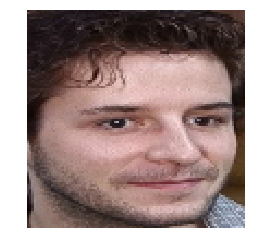

In [10]:
disp_image(X_train[100])

In [11]:
y_train[97]

6.0

Load a pre-trained deep vggface network
Loop over base_model and add each layer to the new model.

In [12]:
from keras_vggface.vggface import VGGFace
from keras.preprocessing import image
#from keras.applications.vgg16 import decode_predictions, preprocess_input  
base_model = VGGFace(include_top=False, input_shape=(100,100,3))
model = Sequential()
for i in base_model.layers:
    model.add(i)
for i in model.layers:
    i.trainable=False
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(51))
model.add(Activation('sigmoid'))

Print the model summary.

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv1_1 (Conv2D)             (None, 100, 100, 64)      1792      
_________________________________________________________________
conv1_2 (Conv2D)             (None, 100, 100, 64)      36928     
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 50, 50, 128)       147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 25, 25, 128)       0         
__________

Train the model:
-compile the model

In [14]:
opt = optimizers.Adam(lr=0.001) 
#opt = optimizers.Adam(lr=0.001) # beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Run the fit.
Each epoch could cost 2 min to run .

In [15]:
# Call the fit function
#X_train= np.expand_dims(X_train, axis=0)
#X_test= np.expand_dims(X_test, axis=0)
model.fit(X_train, y_train, batch_size=7, epochs=20 ,validation_data=(X_test
,y_test))

Train on 714 samples, validate on 51 samples
Epoch 1/20
714/714 [==============================] - 130s - loss: 3.5476 - acc: 0.1681 - val_loss: 2.4543 - val_acc: 0.5686
Epoch 2/20
714/714 [==============================] - 119s - loss: 1.9168 - acc: 0.6232 - val_loss: 1.1223 - val_acc: 0.9020
Epoch 3/20
714/714 [==============================] - 119s - loss: 0.9925 - acc: 0.8459 - val_loss: 0.5699 - val_acc: 0.9216
Epoch 4/20
714/714 [==============================] - 119s - loss: 0.5369 - acc: 0.9342 - val_loss: 0.4070 - val_acc: 0.9216
Epoch 5/20
714/714 [==============================] - 121s - loss: 0.3699 - acc: 0.9524 - val_loss: 0.2862 - val_acc: 0.9608
Epoch 6/20
714/714 [==============================] - 119s - loss: 0.2299 - acc: 0.9846 - val_loss: 0.2370 - val_acc: 0.9412
Epoch 7/20
714/714 [==============================] - 309s - loss: 0.1826 - acc: 0.9832 - val_loss: 0.2258 - val_acc: 0.9216
Epoch 8/20
714/714 [==============================] - 143s - loss: 0.1340 - acc:

Extract a face from a larger image.
Check if the model could fit a certain face extracted from a larger image.

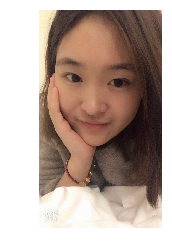

The detected face is


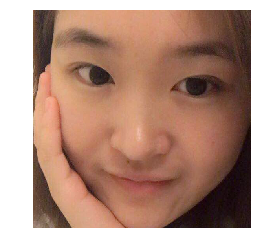

This is Xiangxiang Liu


In [21]:
img0=io.imread('./face_detection/input/IMG_5615.jpg')
img=io.imread('./face_detection/output/s51_15.jpg')
img1=skimage.transform.resize(img, (100,100,3))
img2=np.empty((1,100,100,3))
img2[0]=img1
yhat=model.predict(img2)
a=np.argmax(yhat)
disp_image(img0)
print("The detected face is")
disp_image(img)
if(a==50):
    print("This is Xiangxiang Liu")
else:
    print("This is another person in GT face database")